In [1]:
# getting the required models and readers
!pip install PyPDF2 python-docx spacy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.3 MB/s eta 0:00:00



Menu:
1. Enter a Job Description and Upload Resumes
2. Exit
Enter your choice (1/2): 1
Enter the job description:
Job Description: Reverse Engineering, Malware analysis, Python,RDBMS,NOSQL (Oracle, MSSQL, mysql,IBM Db2, PostgreSQL,MariaDB, SYBASE, SAP HANA, mongoDB)-any of two database technologies
Extracted Keywords from Job Description: {'reverse', 'sap', 'postgresqlmariadb', 'engineering', 'oracle', 'malware', 'mssql', 'technologies', 'mysqlibm', 'sybase', 'mongodbany', 'hana', 'analysis', 'pythonrdbmsnosql', 'database'}


Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv

Resume Ranking:
Rank 1: UpdatedResumeDataSet.csv | Score: 66.67% | Matched Keywords: {'sap', 'reverse', 'engineering', 'oracle', 'mssql', 'technologies', 'sybase', 'hana', 'analysis', 'database'}


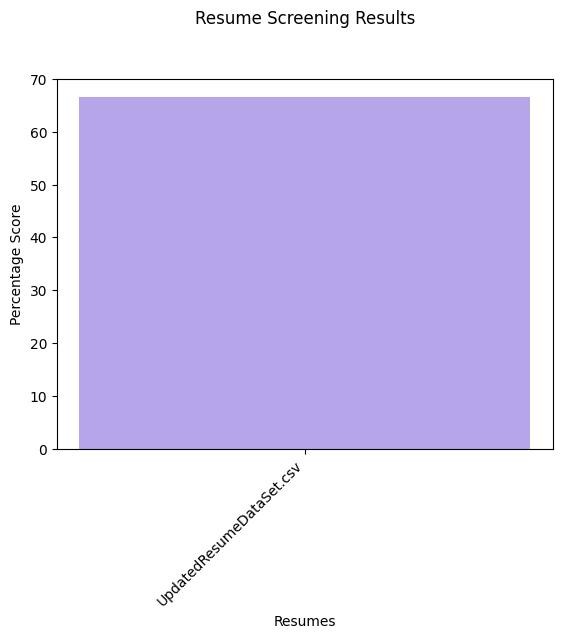


Menu:
1. Enter a Job Description and Upload Resumes
2. Exit
Enter your choice (1/2): 2
Exiting the program. Thank you!


In [1]:
import spacy
import PyPDF2
import docx
import csv
import re
import matplotlib.pyplot as plt

# Hey there, welcome to my project, I am Aarya Shah a 19 year old sophomore from MIT Bengaluru
# Various companies post out their job openings/internships on thousands of sites.
# This project targets not only companies waiting to shorlist their candidate for an interview,
# but also targets various other job-seekers like myself into finding the perfect tool to craft a resume that is ATS friendly.
# Also this is free distributable code, enjoy messing around with this.


# Load Spacy model
# There are only 2 effective constraints,
# ie a) The job posters job description and b) The users resume

nlp = spacy.load("en_core_web_sm")

# Function to extract text from PDF
# extracting..
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
        return text

# Function to extract text from DOCX
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    return '\n'.join([p.text for p in doc.paragraphs])

# Function to extract text from CSV
def extract_text_from_csv(file_path):
  text=[]
  with open(file_path, newline='', encoding='latin-1') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      text.append(' '.join(row))
  return ' '.join(text)

# Function to clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()

# Function to extract keywords from job description
def extract_keywords(job_description):
    doc = nlp(job_description)
    keywords = {token.text for token in doc if token.is_alpha and not token.is_stop}
    return keywords

# Once the keywords have been extracted, cleaned and pre-proccessed we can find a means to compare both the set of keywords
# and the magic begins..
# Function to score a resume, based on job description
def score_resume(resume_text, keywords):
    words = set(resume_text.split())
    matched_keywords = words & keywords
    return len(matched_keywords), matched_keywords

# Main function
def main():
    while True:
        print("\nMenu:")
        print("1. Enter a Job Description and Upload Resumes")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")

        if choice == '1':
            # Step 1: Firstly we get user input for the job description.
            print("Enter the job description:")
            job_description = input("Job Description: ")
            job_keywords = extract_keywords(preprocess_text(job_description))
            print(f"Extracted Keywords from Job Description: {job_keywords}")
            total_keywords = len(job_keywords)

            # Step 2: Upload resumes
            from google.colab import files
            uploaded_files = files.upload()

            scores = []

            # Step 3: Process each uploaded file
            for file_name in uploaded_files.keys():
                if file_name.endswith(".pdf"):
                    text = extract_text_from_pdf(file_name)
                elif file_name.endswith(".docx"):
                    text = extract_text_from_docx(file_name)
                elif file_name.endswith(".csv"):
                    text = extract_text_from_csv(file_name)
                  # with open(file_name, newline='', encoding='utf-8') as csv_file:
                  #   text = ' '.join(row[0] for row in csv.reader(csv_file))
                else:
                    print(f"Unsupported file format: {file_name}")
                    continue

                preprocessed_text = preprocess_text(text)
                matched_count, matched_keywords = score_resume(preprocessed_text, job_keywords)
                percentage_score = (matched_count / total_keywords) * 100 if total_keywords > 0 else 0
                scores.append((file_name, percentage_score, matched_keywords))

            # Step 4: Display results
            scores.sort(key=lambda x: x[1], reverse=True)
            print("\nResume Ranking:")
            for rank, (file_name, percentage_score, matched_keywords) in enumerate(scores, start=1):
                print(f"Rank {rank}: {file_name} | Score: {percentage_score:.2f}% | Matched Keywords: {matched_keywords}")

            # Step 5: Visualization
            labels = [file[0] for file in scores]
            values = [file[1] for file in scores]
            plt.bar(labels, values, color='#B6A6E9')
            plt.xlabel('Resumes')
            plt.ylabel('Percentage Score')
            plt.title('Resume Screening Results', pad=40)
            plt.xticks(rotation=45, ha='right')
            plt.show()

        elif choice == '2':
            print("Exiting the program. Thank you!")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the main function
main()
